In [56]:
import pandas as pd 
import numpy as np
import random
from typing import List, Tuple, Dict, Any

In [84]:
def get_column(data: List[List[float]], index:int) -> List[float]:
    return [row[index] for row in data]

def prepare_data(file_name_dataset:str) -> Tuple[List[List[float]], List[float]]:
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1)
    # N = len(data)
    # tv_data = get_column(data,0)
    # radio_data = get_column(data,1)
    # newspaper_data = get_column(data,2)
    # sales_data = get_column(data,3)

    # X = [tv_data, radio_data, newspaper_data]
    # y = sales_data
    X = data[:, :-1]
    y = data[:, -1]
    return X, y


def initial_params() -> List[float]:
    return np.array([0.016992259082509283, 0.0070783670518262355, -0.002307860847821344]), 0

def predict(X_features: List[float], weights: List[float], bias: float) -> float:
    return np.dot(X_features, weights) + bias

def compute_loss(y_hat: float, y: float) -> float:
    return (y_hat - y) ** 2

def compute_gradients(X_features: np.ndarray, y: float, y_hat: float) -> Tuple[np.ndarray, float]:
    error = y_hat - y
    gradients_w = 2 * X_features * error
    gradient_b = 2 * error
    return gradients_w, gradient_b

def update_parameters(weights: np.ndarray, bias: float, gradients_w: np.ndarray, gradient_b: float, lr: float) -> Tuple[np.ndarray, float]:
    weights -= lr * gradients_w
    bias -= lr * gradient_b
    return weights, bias



def implement_linear_regression(
  X_feat: np.ndarray,
  y_feat: np.ndarray,
  epoch_max: int = 50, 
  lr: float = 1e-5
) -> Tuple[np.ndarray, List[float]]:
    losses: List[float] = []
    weights, bias = initial_params()
  
    N = len(y_feat)
    for epoch in range(epoch_max):
        print(f"Epoch: {epoch+1}")
        for i in range(N):
            feature_i = X_feat[i]
            y = y_feat[i]
            y_hat = predict(feature_i, weights, bias)
            loss = compute_loss(y_hat, y)
            gradients_w, gradient_b = compute_gradients(feature_i, y, y_hat)
            weights, bias = update_parameters(weights, bias, gradients_w, gradient_b, lr)

            losses.append(loss)
      
    return weights, losses, bias



def implement_linear_regression_batch(
  X_feat: np.ndarray,
  y_feat: np.ndarray,
  epoch_max: int = 50, 
  lr: float = 1e-5
) -> Tuple[np.ndarray, List[float]]:
    losses: List[float] = []
    weights, bias = initial_params()
  
    N = len(y_feat)
    for epoch in range(epoch_max):
        total_loss = 0
        total_gradients_w = np.zeros_like(weights)
        total_gradient_b = 0.0


        for i in range(N):
            feature_i = X_feat[i]
            y = y_feat[i]
            y_hat = predict(feature_i, weights, bias)
            loss = compute_loss(y_hat, y)
            gradients_w, gradient_b = compute_gradients(feature_i, y, y_hat)
            total_gradients_w += gradients_w
            total_gradient_b += gradient_b
            total_loss += loss
        
        weights, bias = update_parameters(weights, bias, total_gradients_w/N, total_gradient_b/N, lr)

        losses.append(loss/N)
      
    return weights, losses, bias

In [64]:
# X,y = prepare_data('./advertising.csv')
# list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
# print(list)

In [65]:
X, y = prepare_data('./advertising.csv')
X.shape, y.shape

((200, 3), (200,))

In [89]:
W, L , b= implement_linear_regression(X, y)

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50


In [90]:
L[9999]

31.338878034644296

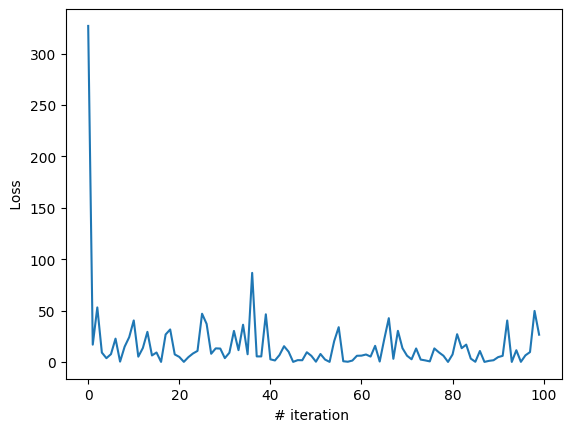

In [70]:
import matplotlib.pyplot as plt
plt.plot(L[:100])
plt.xlabel ("# iteration ")
plt.ylabel (" Loss ")
plt.show ()

In [71]:
W

array([0.07405984, 0.1591736 , 0.0175612 ])

In [75]:
predict(
    [19.2, 35.9, 51.3],
    W,
    b
)

8.176413319549823

In [85]:
X, y = prepare_data('./advertising.csv')
W, L, b = implement_linear_regression_batch(X,y, 1000, 1e-5)

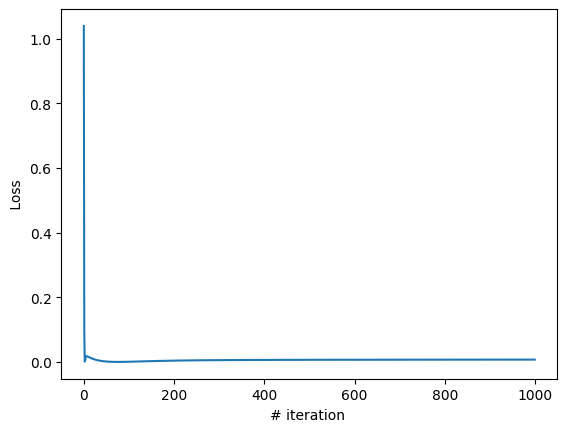

In [87]:
import matplotlib.pyplot as plt
plt.plot(L)
plt.xlabel ("# iteration ")
plt.ylabel (" Loss ")
plt.show ()

In [88]:
W

array([0.06710991, 0.15756174, 0.0296198 ])